<a href="https://colab.research.google.com/github/Ash-Daniels-Mo/OPTIMIZATION/blob/main/Convex_and_Non_Convex_Optimization_in_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import log_loss, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

X = StandardScaler().fit_transform(X)


In [ ]:
loss_histories = []
acc_histories = []

for seed in [0, 10, 42, 15]:
    model = LogisticRegression(
        solver="lbfgs",
        max_iter=200,
        random_state=seed
    )

    model.fit(X, y)
    probs = model.predict_proba(X)
    loss = log_loss(y, probs)
    loss_histories.append(loss)
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    acc_histories.append(acc)

print("Final losses (should be very similar):", loss_histories)
print("Final accuracies (should be very similar):", acc_histories)


Final losses (should be very similar): [0.09052649089126005, 0.09052649089126005, 0.09052649089126005, 0.09052649089126005]
Final accuracies (should be very similar): [0.977, 0.977, 0.977, 0.977]


In [ ]:
from sklearn.svm import LinearSVC

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

X = StandardScaler().fit_transform(X)


In [ ]:
svm_losses = []
svm_accs = []

for seed in [0, 10, 42]:
    svm = LinearSVC(
        C=1.0,
        max_iter=5000,
        random_state=seed
    )

    svm.fit(X, y)
    y_pred = svm.predict(X)
    acc = accuracy_score(y, y_pred)

    svm_accs.append(acc)

print("SVM accuracies (very similar):", svm_accs)


SVM accuracies (very similar): [0.977, 0.977, 0.977]


In [ ]:
X_blobs, _ = make_blobs(
    n_samples=500,
    centers=3,
    cluster_std=1.2,
    random_state=42
)


In [ ]:
inertias = []
labels_list = []

for seed in [0, 5, 20]:
    kmeans = KMeans(
        n_clusters=3,
        init="random",
        n_init=1,
        random_state=seed
    )
    kmeans.fit(X_blobs)
    inertias.append(kmeans.inertia_)
    labels_list.append(kmeans.labels_)


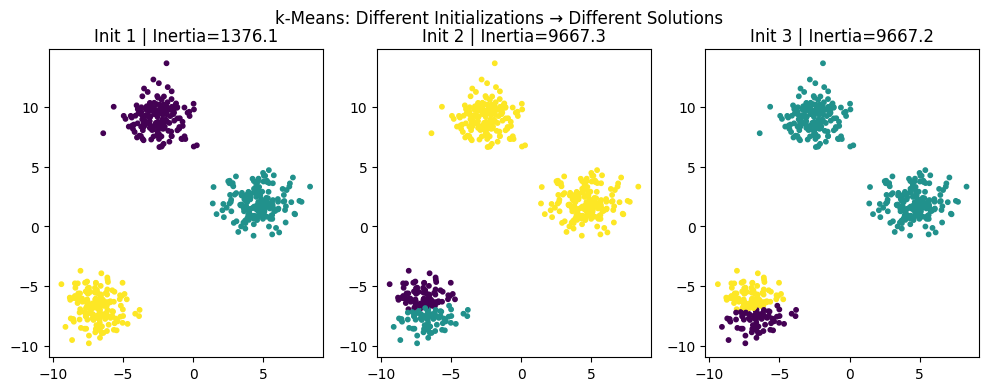

In [ ]:
plt.figure(figsize=(12,4))

for i, labels in enumerate(labels_list):
    plt.subplot(1,3,i+1)
    plt.scatter(X_blobs[:,0], X_blobs[:,1], c=labels, s=10)
    plt.title(f"Init {i+1} | Inertia={inertias[i]:.1f}")

plt.suptitle("k-Means: Different Initializations → Different Solutions")
plt.show()


In [ ]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1,1)


In [ ]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)


In [ ]:
def train_nn(seed):
    torch.manual_seed(seed)
    model = SimpleMLP()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.BCELoss()

    losses = []

    for epoch in range(200):
        optimizer.zero_grad()
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    return losses


In [ ]:
losses_1 = train_nn(0)
losses_2 = train_nn(10)
losses_3 = train_nn(42)


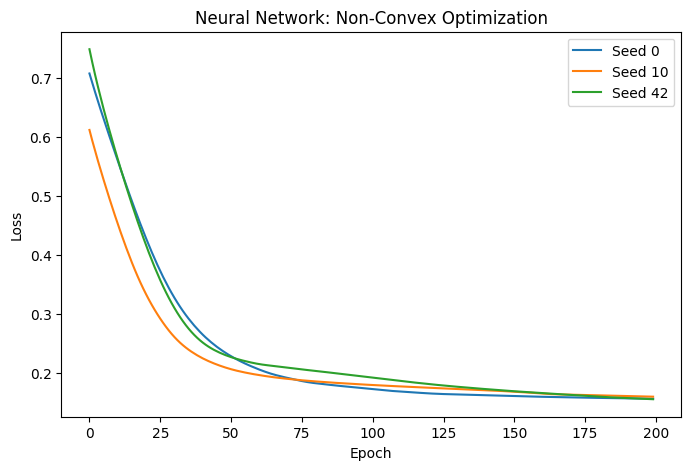

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(losses_1, label="Seed 0")
plt.plot(losses_2, label="Seed 10")
plt.plot(losses_3, label="Seed 42")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Neural Network: Non-Convex Optimization")
plt.legend()
plt.show()
